In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

Geração 0: Melhor custo = 20.55633331575608
Geração 1: Melhor custo = 20.55633331575608
Geração 2: Melhor custo = 20.55633331575608
Geração 3: Melhor custo = 20.55633331575608
Geração 4: Melhor custo = 20.55633331575608
Geração 5: Melhor custo = 20.55633331575608
Geração 6: Melhor custo = 20.55633331575608
Geração 7: Melhor custo = 20.55633331575608
Geração 8: Melhor custo = 20.55633331575608
Geração 9: Melhor custo = 20.55633331575608
Geração 10: Melhor custo = 20.55633331575608
Geração 11: Melhor custo = 20.55633331575608
Geração 12: Melhor custo = 20.55633331575608
Geração 13: Melhor custo = 20.55633331575608
Geração 14: Melhor custo = 20.55633331575608
Geração 15: Melhor custo = 20.55633331575608
Geração 16: Melhor custo = 20.55633331575608
Geração 17: Melhor custo = 20.55633331575608
Geração 18: Melhor custo = 20.55633331575608
Geração 19: Melhor custo = 20.55633331575608
Geração 20: Melhor custo = 20.55633331575608
Geração 21: Melhor custo = 20.55633331575608
Geração 22: Melhor c

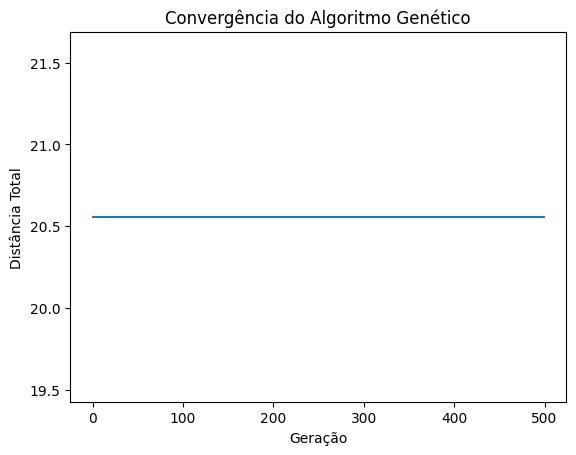


Melhor rota encontrada: [3, 4, 0, 1, 2]
Distância total: 20.55633331575608


In [5]:

# Definição das cidades e suas coordenadas
cidades = {
    0: (0, 0),  # Cidade 0 na coordenada (0, 0)
    1: (1, 5),  # Cidade 1 na coordenada (1, 5)
    2: (5, 6),  # Cidade 2 na coordenada (5, 6)
    3: (7, 3),  # Cidade 3 na coordenada (7, 3)
    4: (3, 2)   # Cidade 4 na coordenada (3, 2)
}

# Parâmetros do algoritmo genético
TAMANHO_POPULACAO = 100
NUMERO_GERACOES = 500
TAXA_MUTACAO = 0.01

# Função para calcular a distância euclidiana entre duas cidades
def calcular_distancia(cidade1, cidade2):
    x1, y1 = cidades[cidade1]
    x2, y2 = cidades[cidade2]
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Função para calcular o custo (distância total) de uma rota
def calcular_custo(rota):
    custo = 0
    for i in range(len(rota) - 1):
        custo += calcular_distancia(rota[i], rota[i+1])
    custo += calcular_distancia(rota[-1], rota[0])  # Retorno à cidade inicial
    return custo

# Função para criar uma rota aleatória
def criar_rota():
    rota = list(cidades.keys())
    random.shuffle(rota)
    return rota

# Função para criar a população inicial
def criar_populacao():
    return [criar_rota() for _ in range(TAMANHO_POPULACAO)]

# Função para realizar a seleção com torneio
def selecao_torneio(populacao, k=3):
    selecionados = random.sample(populacao, k)
    selecionados.sort(key=calcular_custo)
    return selecionados[0]

# Função para realizar o crossover (ordem parcial)
def crossover(pai1, pai2):
    inicio = random.randint(0, len(pai1) - 2)
    fim = random.randint(inicio, len(pai1) - 1)

    filho = [None] * len(pai1)
    filho[inicio:fim] = pai1[inicio:fim]

    pos = fim
    for cidade in pai2:
        if cidade not in filho:
            if pos >= len(filho):
                pos = 0
            filho[pos] = cidade
            pos += 1

    return filho

# Função para realizar a mutação (troca de duas cidades)
def mutacao(rota):
    if random.random() < TAXA_MUTACAO:
        i, j = random.sample(range(len(rota)), 2)
        rota[i], rota[j] = rota[j], rota[i]
    return rota

# Função principal para rodar o algoritmo genético
def algoritmo_genetico():
    populacao = criar_populacao()
    historico_custos = []

    for geracao in range(NUMERO_GERACOES):
        nova_populacao = []

        for _ in range(TAMANHO_POPULACAO):
            pai1 = selecao_torneio(populacao)
            pai2 = selecao_torneio(populacao)
            filho = crossover(pai1, pai2)
            filho = mutacao(filho)
            nova_populacao.append(filho)

        populacao = nova_populacao

        # Salvar o melhor custo para análise
        melhor_rota = min(populacao, key=calcular_custo)
        historico_custos.append(calcular_custo(melhor_rota))

        print(f"Geração {geracao}: Melhor custo = {historico_custos[-1]}")

    # Exibir gráfico de convergência
    plt.plot(historico_custos)
    plt.title("Convergência do Algoritmo Genético")
    plt.xlabel("Geração")
    plt.ylabel("Distância Total")
    plt.show()

    return melhor_rota

# Executa o algoritmo
melhor_rota = algoritmo_genetico()
print("\nMelhor rota encontrada:", melhor_rota)
print("Distância total:", calcular_custo(melhor_rota))
